In [1]:
#### Importing libraries.

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas.plotting import register_matplotlib_converters #Register pandas formatters and converters with matplotlib.
from pylab import rcParams # for customizing matplotlib graphs.
sns.set_style("whitegrid") # This one is very important to keep overall plot background as white

from numpy import asarray
import missingno as msno

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline      
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier
from sklearn.svm           import SVC

In [2]:
data = pd.read_csv(r'C:\Users\rnr31\Documents\GitHub\apple_watch_tracker\Datasets\dataset_0.5sec.csv')
data['target']= data['target'].apply({'Bus':0, 'Car':1, 'Still':2, 'Train':3, 'Walking':4}.get)
data = data.sort_values(by='target')
oe = OrdinalEncoder()
ct = asarray(data['user'])
data['user'] = oe.fit_transform(ct.reshape(-1,1))
data

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,0,156661,3.0,NaN,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0
8339,8339,3828,603.0,NaN,100.0,9.652242,9.652242,9.652242,0.034207,0.920400,...,89.769040,89.769040,89.769040,NaN,0.00,0.00,0.00,NaN,0,0.0
8340,8340,3829,604.0,NaN,100.0,9.610172,9.610172,9.610172,0.034207,0.920400,...,89.769040,89.769040,89.769040,NaN,0.00,0.00,0.00,NaN,0,0.0
8341,8341,3830,605.0,NaN,100.0,9.744891,9.744891,9.744891,0.034207,0.920400,...,89.769040,89.769040,89.769040,NaN,0.00,0.00,0.00,NaN,0,0.0
8342,8342,3831,606.0,NaN,100.0,9.655109,9.650565,9.659653,0.006426,0.920400,...,89.769040,89.769040,89.769040,NaN,0.00,0.00,0.00,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54243,54243,150179,210.0,NaN,100.0,13.316010,12.839611,13.792409,0.673730,0.960124,...,77.221125,77.221125,77.221125,NaN,NaN,NaN,NaN,NaN,4,5.0
54244,54244,152607,69.0,NaN,100.0,10.817786,7.536768,14.098805,4.640061,0.914489,...,85.134836,85.134836,85.134836,NaN,0.00,0.00,0.00,NaN,4,5.0
54245,54245,156439,550.0,NaN,100.0,13.185417,13.185417,13.185417,0.569210,0.958223,...,82.049360,82.049360,82.049360,NaN,1.71,1.71,1.71,NaN,4,5.0
54223,54223,147616,531.0,NaN,100.0,9.862667,7.479976,13.095071,2.362392,0.173898,...,75.356470,75.356470,75.356470,NaN,0.84,0.84,0.84,NaN,4,5.0


In [3]:
def col_names_change(data):
    data.drop(['Unnamed: 0','id', 'activityrecognition#0'],axis=1, inplace=True)
    data_col = ['time','activityrecognition_1']
    for i in data.columns[2:58]:
        b = i.split('.')[2].split('#')
        data_col.append(f'{b[0]}_{b[1]}')

    for i in data.columns[58:66]:
        b = i.split('#')
        data_col.append(f'{b[0]}_{b[1]}')

    data_col.append('target')
    data_col.append('user')
    data = pd.DataFrame.from_records(data.values)
    data.columns = data_col

    return data


data = col_names_change(data)
data

,time,activityrecognition_1,accelerometer_mean,accelerometer_min,accelerometer_max,accelerometer_std,game_rotation_vector_mean,game_rotation_vector_min,game_rotation_vector_max,game_rotation_vector_std,...,sound_mean,sound_min,sound_max,sound_std,speed_mean,speed_min,speed_max,speed_std,target,user
0,3.0,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,0.762086,0.114439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0
1,603.0,100.0,9.652242,9.652242,9.652242,0.034207,0.920400,0.920400,0.920400,0.000076,...,89.769040,89.769040,89.769040,NaN,0.00,0.00,0.00,NaN,0.0,0.0
2,604.0,100.0,9.610172,9.610172,9.610172,0.034207,0.920400,0.920400,0.920400,0.000076,...,89.769040,89.769040,89.769040,NaN,0.00,0.00,0.00,NaN,0.0,0.0
3,605.0,100.0,9.744891,9.744891,9.744891,0.034207,0.920400,0.920400,0.920400,0.000076,...,89.769040,89.769040,89.769040,NaN,0.00,0.00,0.00,NaN,0.0,0.0
4,606.0,100.0,9.655109,9.650565,9.659653,0.006426,0.920400,0.920400,0.920400,0.000076,...,89.769040,89.769040,89.769040,NaN,0.00,0.00,0.00,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,210.0,100.0,13.316010,12.839611,13.792409,0.673730,0.960124,0.960124,0.960124,0.001209,...,77.221125,77.221125,77.221125,NaN,NaN,NaN,NaN,NaN,4.0,5.0
62581,69.0,100.0,10.817786,7.536768,14.098805,4.640061,0.914489,0.914489,0.914489,0.010165,...,85.134836,85.134836,85.134836,NaN,0.00,0.00,0.00,NaN,4.0,5.0
62582,550.0,100.0,13.185417,13.185417,13.185417,0.569210,0.958223,0.958223,0.958223,0.006058,...,82.049360,82.049360,82.049360,NaN,1.71,1.71,1.71,NaN,4.0,5.0
62583,531.0,100.0,9.862667,7.479976,13.095071,2.362392,0.173898,0.141707,0.206088,0.045524,...,75.356470,75.356470,75.356470,NaN,0.84,0.84,0.84,NaN,4.0,5.0


In [4]:
data.drop(['pressure_mean', 'pressure_max', 'pressure_min', 'pressure_std', 'sound_std', 'speed_std','step_counter_mean','step_counter_std','light_std',
            'proximity_mean','proximity_min','proximity_max','proximity_std', 'step_counter_min', 'step_counter_max' ], axis=1, inplace=True)

data

,time,activityrecognition_1,accelerometer_mean,accelerometer_min,accelerometer_max,accelerometer_std,game_rotation_vector_mean,game_rotation_vector_min,game_rotation_vector_max,game_rotation_vector_std,...,rotation_vector_max,rotation_vector_std,sound_mean,sound_min,sound_max,speed_mean,speed_min,speed_max,target,user
0,3.0,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,0.762086,0.114439,...,0.809349,0.137706,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0
1,603.0,100.0,9.652242,9.652242,9.652242,0.034207,0.920400,0.920400,0.920400,0.000076,...,0.947095,0.000030,89.769040,89.769040,89.769040,0.00,0.00,0.00,0.0,0.0
2,604.0,100.0,9.610172,9.610172,9.610172,0.034207,0.920400,0.920400,0.920400,0.000076,...,0.947065,0.000018,89.769040,89.769040,89.769040,0.00,0.00,0.00,0.0,0.0
3,605.0,100.0,9.744891,9.744891,9.744891,0.034207,0.920400,0.920400,0.920400,0.000076,...,0.947065,0.000018,89.769040,89.769040,89.769040,0.00,0.00,0.00,0.0,0.0
4,606.0,100.0,9.655109,9.650565,9.659653,0.006426,0.920400,0.920400,0.920400,0.000076,...,0.947212,0.000062,89.769040,89.769040,89.769040,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,210.0,100.0,13.316010,12.839611,13.792409,0.673730,0.960124,0.960124,0.960124,0.001209,...,0.824616,0.007836,77.221125,77.221125,77.221125,NaN,NaN,NaN,4.0,5.0
62581,69.0,100.0,10.817786,7.536768,14.098805,4.640061,0.914489,0.914489,0.914489,0.010165,...,0.820825,0.013300,85.134836,85.134836,85.134836,0.00,0.00,0.00,4.0,5.0
62582,550.0,100.0,13.185417,13.185417,13.185417,0.569210,0.958223,0.958223,0.958223,0.006058,...,0.766955,0.033363,82.049360,82.049360,82.049360,1.71,1.71,1.71,4.0,5.0
62583,531.0,100.0,9.862667,7.479976,13.095071,2.362392,0.173898,0.141707,0.206088,0.045524,...,0.543921,0.026578,75.356470,75.356470,75.356470,0.84,0.84,0.84,4.0,5.0


In [16]:
# df.loc[:, ~df.columns.str.contains("BC")]
data = data.drop(data.filter(regex='mean').columns, axis=1)
data.columns

Index(['time', 'activityrecognition_1', 'accelerometer_min',
       'accelerometer_max', 'accelerometer_std', 'game_rotation_vector_min',
       'game_rotation_vector_max', 'game_rotation_vector_std', 'gravity_min',
       'gravity_max', 'gravity_std', 'gyroscope_min', 'gyroscope_max',
       'gyroscope_std', 'gyroscope_uncalibrated_min',
       'gyroscope_uncalibrated_max', 'gyroscope_uncalibrated_std', 'light_min',
       'light_max', 'linear_acceleration_min', 'linear_acceleration_max',
       'linear_acceleration_std', 'magnetic_field_min', 'magnetic_field_max',
       'magnetic_field_std', 'magnetic_field_uncalibrated_min',
       'magnetic_field_uncalibrated_max', 'magnetic_field_uncalibrated_std',
       'orientation_min', 'orientation_max', 'orientation_std',
       'rotation_vector_min', 'rotation_vector_max', 'rotation_vector_std',
       'sound_min', 'sound_max', 'speed_min', 'speed_max', 'target', 'user'],
      dtype='object')

In [5]:
df0 = data[data['target']==0]
df1 = data[data['target']==1]
df2 = data[data['target']==2]
df3 = data[data['target']==3]
df4 = data[data['target']==4]



<AxesSubplot:>

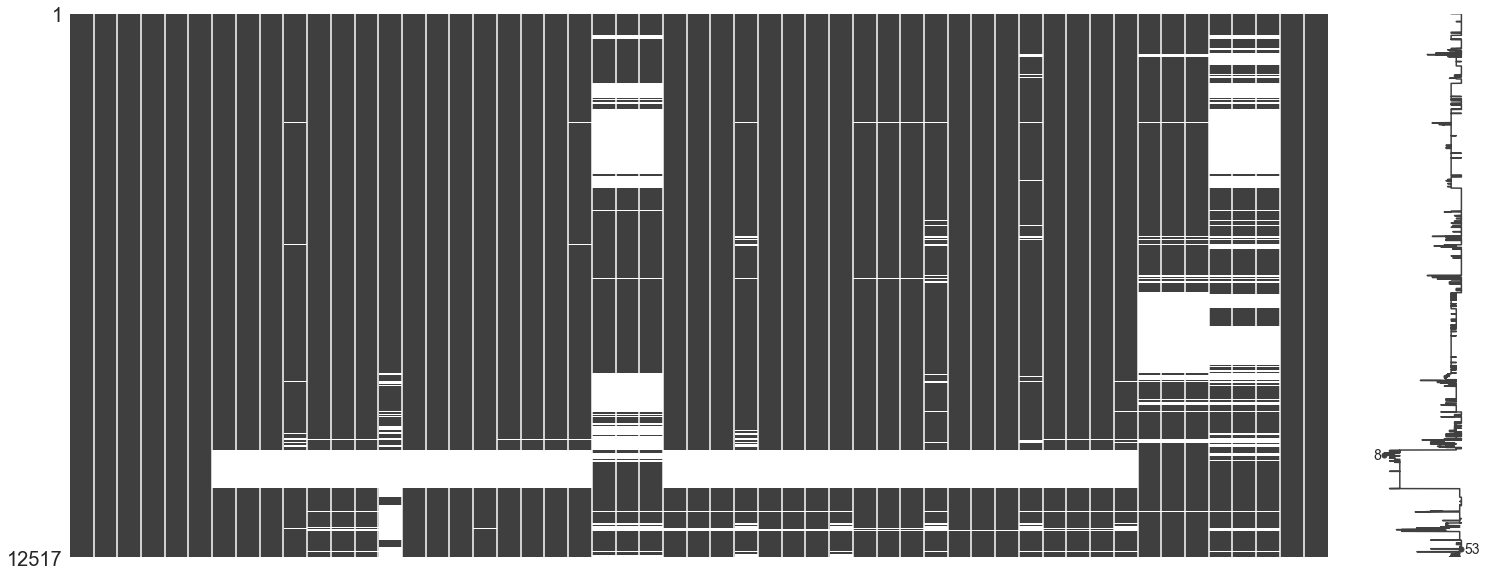

In [6]:
df0 = df0.sort_values(by='user')
msno.matrix(df0)

<AxesSubplot:>

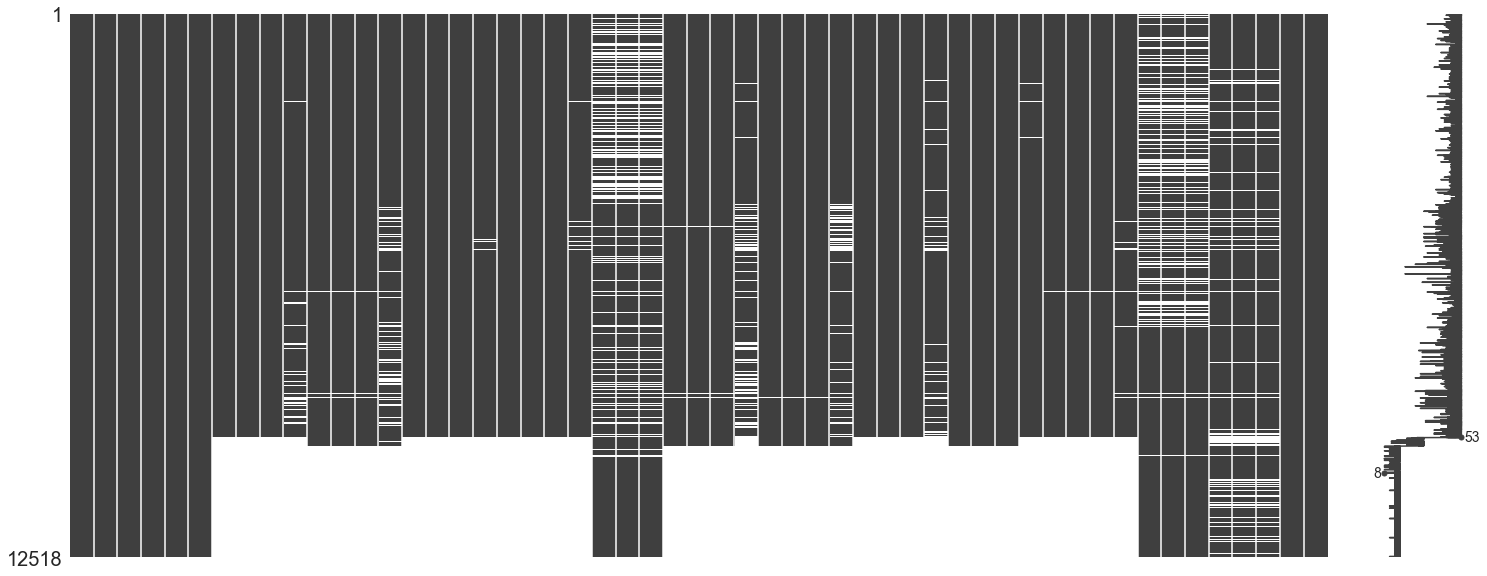

In [7]:
df1 = df1.sort_values(by='user')
msno.matrix(df1)

<AxesSubplot:>

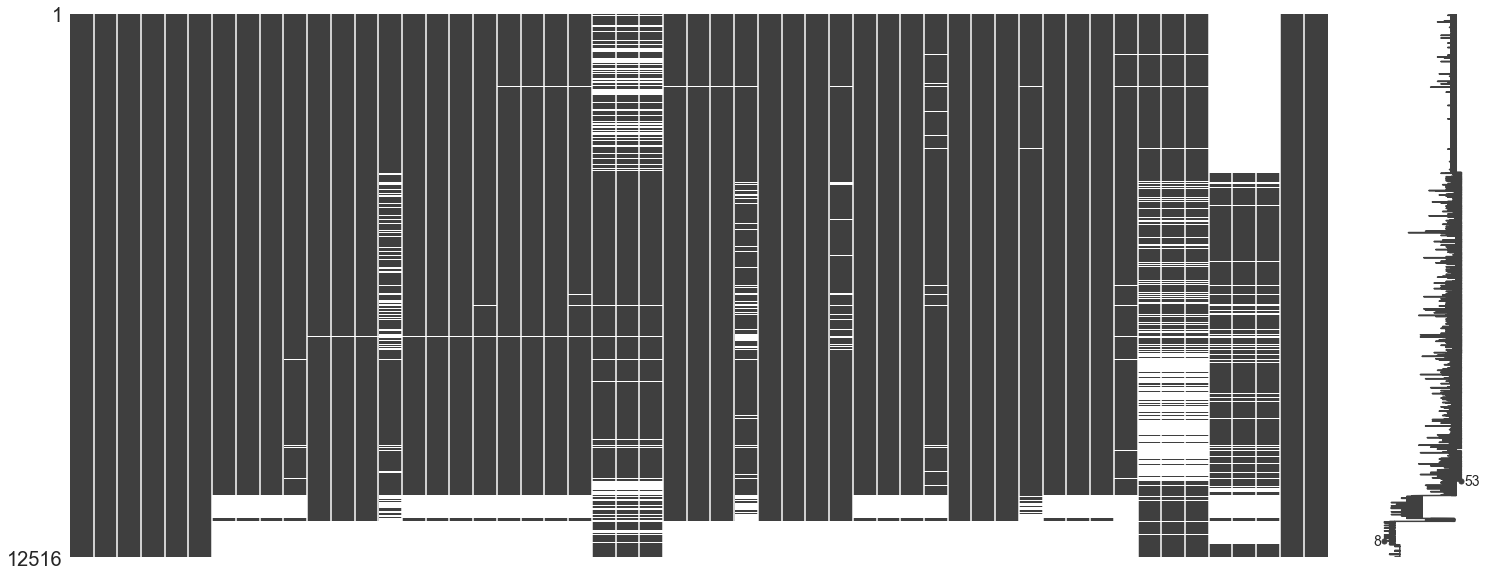

In [8]:
df2 = df2.sort_values(by='user')
msno.matrix(df2)

<AxesSubplot:>

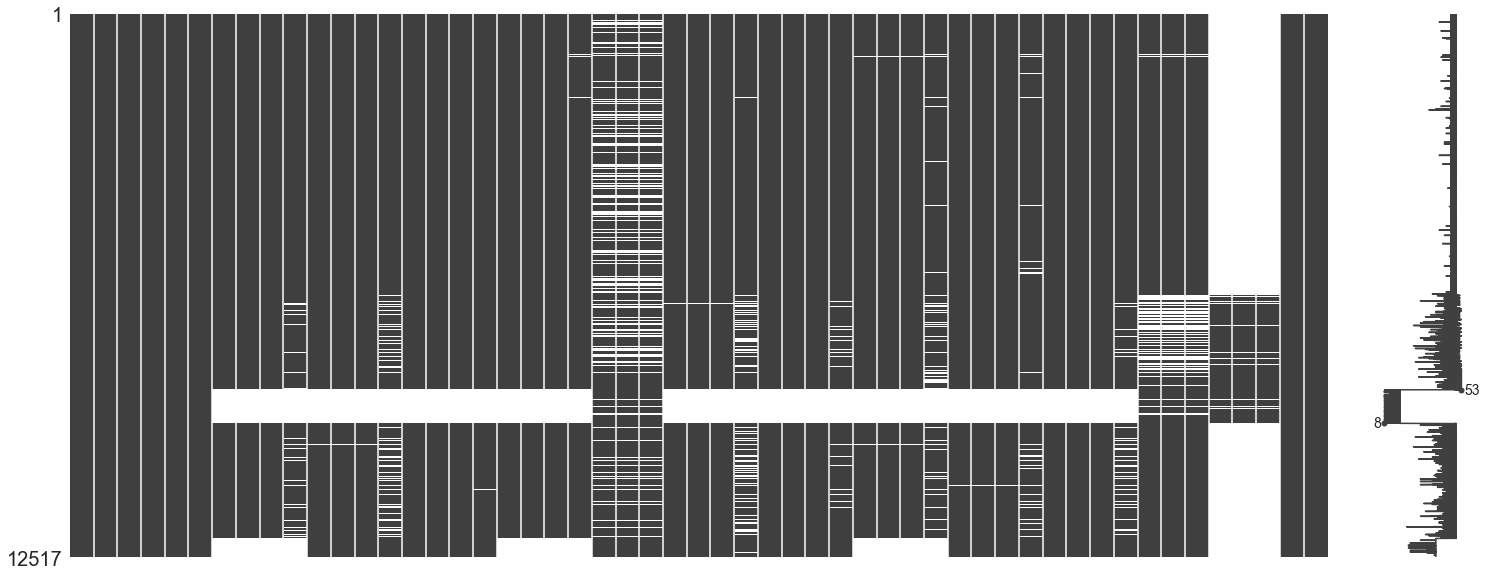

In [9]:
df3 = df3.sort_values(by='user')
msno.matrix(df3)

<AxesSubplot:>

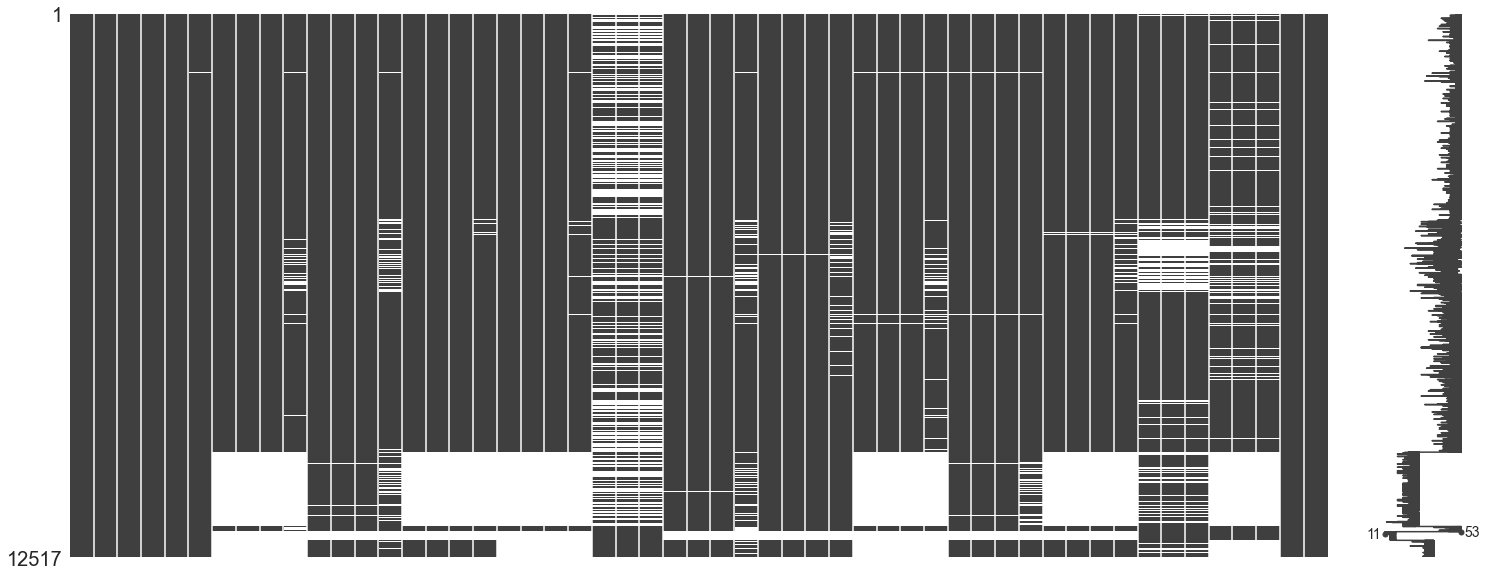

In [10]:
df4 = df4.sort_values(by='user')
msno.matrix(df4)

In [11]:
df5= df4.groupby(['user'])['gyroscope_max'].mean()
df5

user
0.0     1.770439
1.0     1.286314
3.0     2.973966
5.0     0.832991
6.0     1.273107
7.0          NaN
8.0     1.239771
9.0          NaN
12.0    3.320880
Name: gyroscope_max, dtype: float64

In [15]:
df6= df3.groupby(['target'])['gyroscope_max'].mean()
df6

target
3.0    0.081331
Name: gyroscope_max, dtype: float64

In [13]:
df7= df2.groupby(['user'])['gyroscope_max'].mean()
df7

user
0.0     0.033564
1.0     0.124541
3.0     0.043177
5.0     0.126050
7.0          NaN
8.0     0.313296
9.0          NaN
11.0         NaN
Name: gyroscope_max, dtype: float64

In [14]:
df8= df1.groupby(['user'])['gyroscope_max'].mean()
df8

user
0.0     0.124512
1.0     0.238770
2.0     0.086932
3.0     0.115523
4.0     0.154254
5.0     0.283883
7.0          NaN
9.0          NaN
11.0         NaN
Name: gyroscope_max, dtype: float64

In [ ]:
nd1 = data.groupby(['user','target'])[ac]